
<br>
<font>
<!-- <img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" alt="SUT logo" width=300 height=300 align=left class="saturate"> -->
<div dir=ltr align=center>
<img src="https://cdn.freebiesupply.com/logos/large/2x/sharif-logo-png-transparent.png" width=200 height=200>
<br>
<font color=0F5298 size=7>
Machine Learning <br>
<font color=2565AE size=5>
Electrical Engineering Department <br>
Spring 2024<br>
<font color=3C99D size=5>
Practical Assignment 4 <br>
<font color=696880 size=4>
<!-- <br> -->


____

# Personal Data

In [1]:
student_number =  '400101504'
first_name = 'Amirreza'
last_name = 'Zameni'

# Introduction

In this assignment, we will be performing clustering on Spotify songs.

# Data Preprocessing

In the next cell, import the libraries you'll need.

In [22]:
# TODO: Write your code here
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In the `spotify.csv` file, load the data. Exclude unrelated features and retain only the track name and the features you believe are relevant.

In [23]:
# TODO: Write your code here
data = pd.read_csv('spotify.csv')  # Replace with your actual dataset file
features_to_keep = ['track_name', 'danceability', 'energy', 'playlist_subgenre','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
data_pure = data[features_to_keep]
print(data_pure.head())

                                          track_name  danceability  energy  \
0  I Don't Care (with Justin Bieber) - Loud Luxur...         0.748   0.916   
1                    Memories - Dillon Francis Remix         0.726   0.815   
2                    All the Time - Don Diablo Remix         0.675   0.931   
3                  Call You Mine - Keanu Silva Remix         0.718   0.930   
4            Someone You Loved - Future Humans Remix         0.650   0.833   

  playlist_subgenre  key  loudness  speechiness  acousticness  \
0         dance pop    6    -2.634       0.0583        0.1020   
1         dance pop   11    -4.969       0.0373        0.0724   
2         dance pop    1    -3.432       0.0742        0.0794   
3         dance pop    7    -3.778       0.1020        0.0287   
4         dance pop    1    -4.672       0.0359        0.0803   

   instrumentalness  liveness  valence    tempo  duration_ms  
0          0.000000    0.0653    0.518  122.036       194754  
1          0.0

In [24]:
def standard_scale(data):
    """
    Standardizes the input data using the z-score method.
    
    Args:
        data (pd.DataFrame): Input data with numerical features.
        
    Returns:
        pd.DataFrame: Scaled data.
    """
    # Calculate mean and standard deviation for each column
    means = data.mean(axis=0)
    
    stds = data.std(axis=0)
    
    
    # Apply z-score transformation
    scaled_data = (data - means) / stds
    
    return scaled_data

In [25]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_catted = data_pure.assign( playlist_subgenre=le.fit_transform(data_pure['playlist_subgenre']))
data_ready_to_nor = data_catted.drop('track_name', axis=1).values

data_nor=standard_scale(data_ready_to_nor)


In this cell, you should implement a standard scalar function from scratch and applying it to your data. Explian importance behind using a standard scalar and the potential complications that could arise in clustering if it's not employed. (you can't use `sklearn.preprocessing.StandardScaler` but you are free to use `sklearn.preprocessing.LabelEncoder`)

In [ ]:
# TODO: Write your code here
# done higher up

# Dimensionality Reduction

One method for dimensionality reduction is Principal Component Analysis (PCA). Use its implementation from the `sklearn` library to reduce the dimensions of your data. Then, by using an appropriate cut-off for the `_explained_variance_ratio_` in the PCA algorithm, determine the number of principal components to retain.

In [26]:
# TODO: Write your code here
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(data_nor)

variance_in_each= pca.explained_variance_ratio_

# Cumulative explained variance ratio
variance_sum = np.cumsum(variance_in_each)

# Find the number of principal components to retain
n_components = np.where(variance_sum >= 0.95)[0][0] + 1

print(n_components)

data_low_dim = pca.transform(data_nor)[:, :n_components]



#data_low_dim=pca.transform(data_nor)

11


# Clustering

Implement K-means for clustering from scratch.

In [27]:
# TODO: Write your code here
def kmeans(X, k, max_iters=100):
    # Initialize centroids randomly
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]

    for _ in range(max_iters):
        # Assign data points to nearest centroids
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        # Check for convergence
        if np.all(new_centroids == centroids):
            break

        centroids = new_centroids

    return centroids, labels
def Wss_score(data,centroids,labels,k):
    return np.sum([np.sum(np.linalg.norm(data[labels == i] - centroids[i], axis=1)**2) for i in range(k)])

def plot_multiple_r2_on_same_axis(train_test_ratios, r2_values_list, labels,ylim,x_label,y_label,title,log):
    
    assert len(r2_values_list) == len(labels), "Number of R² value vectors must match the number of labels"
    plt.figure(figsize=(8, 6))
    for i, r2_values in enumerate(r2_values_list):
        if(log==0):
            plt.plot(train_test_ratios, r2_values, marker='o', label=labels[i])
        elif(log==1): 
            plt.semilogx(train_test_ratios, r2_values,marker='o', label=labels[i])
        elif(log==2):
            plt.semilogx(train_test_ratios, r2_values, label=labels[i])
        elif(log==3):
            plt.semilogy(train_test_ratios, r2_values, label=labels[i])        
    plt.xlabel(x_label)#'Train Ratio')
    plt.ylabel(y_label)#'R² Value')
    plt.title(title)#'R² vs. Train Ratio')
    plt.ylim(ylim)
    plt.grid(True)
    plt.legend()
    plt.show()


Using the function you've created to execute the K-means algorithm eight times on your data, with the number of clusters ranging from 2 to 9. For each run, display the genre of each cluster using the first two principal components in a plot.

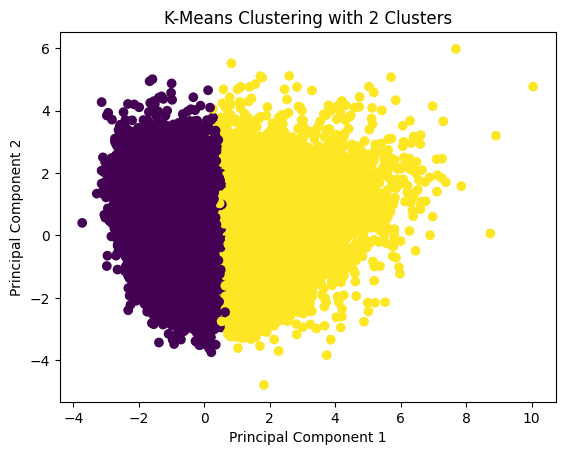

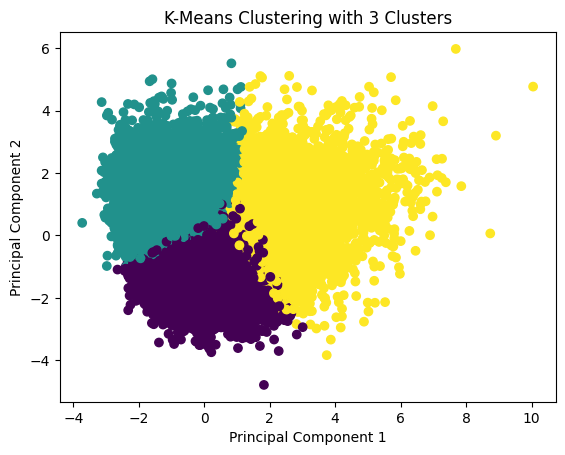

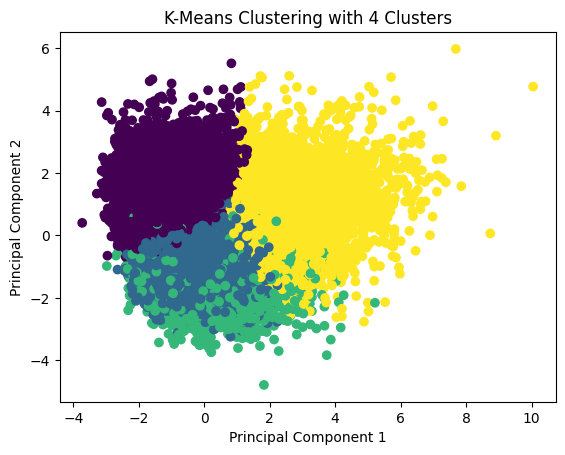

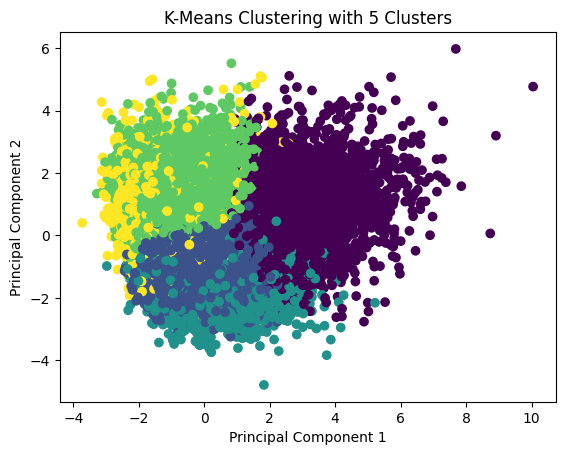

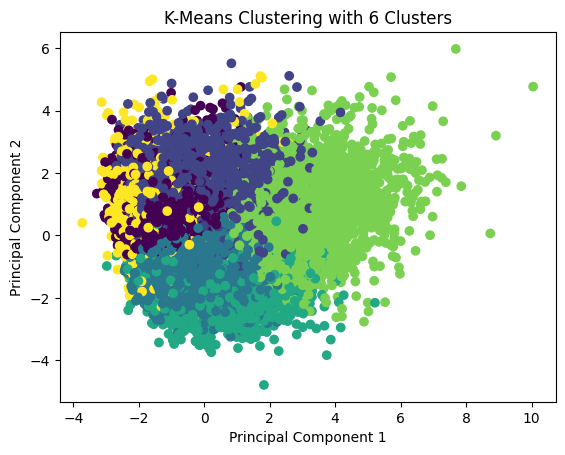

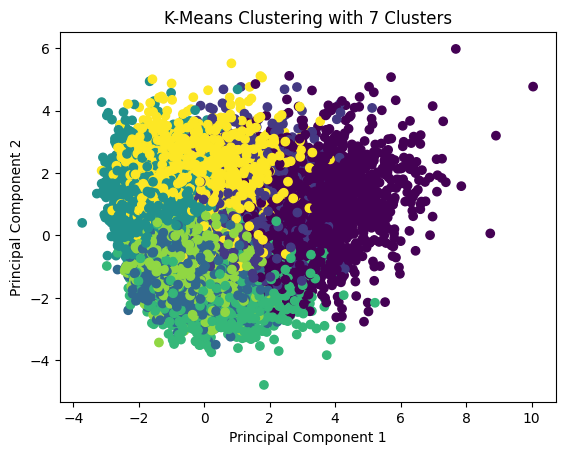

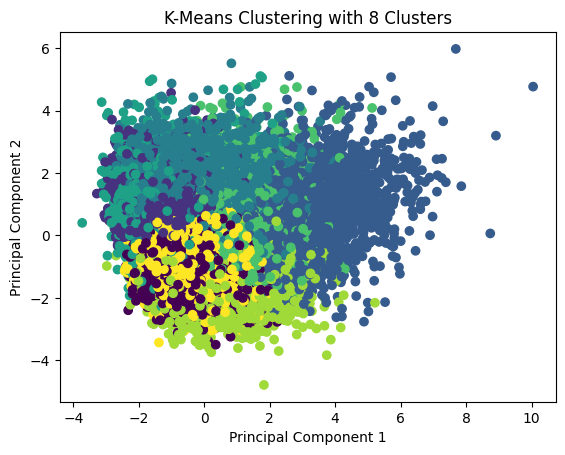

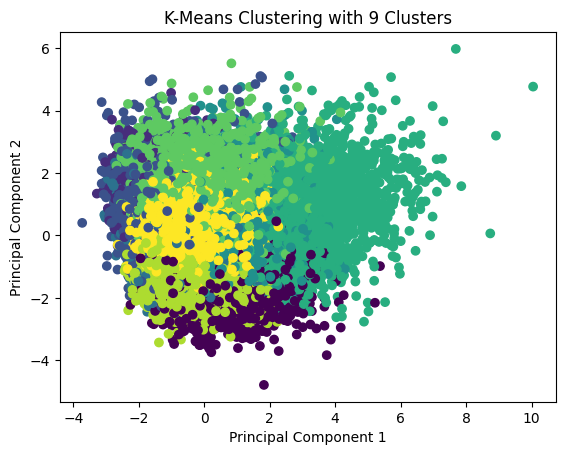

In [11]:
# TODO: Write your code here
from sklearn.metrics import silhouette_score
sil_scores = []
wss_scores = []
for k in range(2, 10):
    centroids, labels = kmeans(data_low_dim, k)
    sil_scores.append(silhouette_score(data_low_dim, labels))
    wss_scores.append(Wss_score(data_low_dim,centroids,labels,k))
    plt.scatter(data_low_dim[:, 0], data_low_dim[:, 1], c=labels)
    plt.title(f'K-Means Clustering with {k} Clusters')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()


The Silhouette score and the Within-Cluster Sum of Squares (WSS) score are two metrics used to assess the quality of your clustering. You can find more information about these two methods [here](https://medium.com/analytics-vidhya/how-to-determine-the-optimal-k-for-k-means-708505d204eb). Plot the Silhouette score and the WSS score for varying numbers of clusters, and use these plots to determine the optimal number of clusters (k).<br>
**As we** can see optimal value is 6 where Silhouette score is reletively high an WSS has an elbo

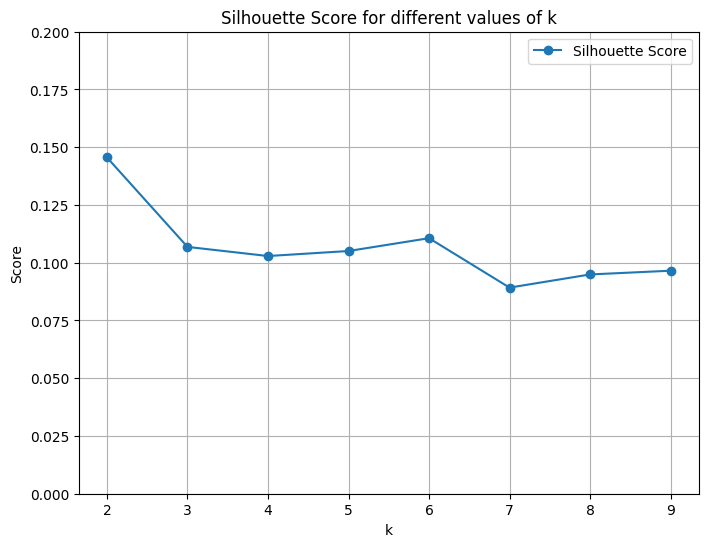

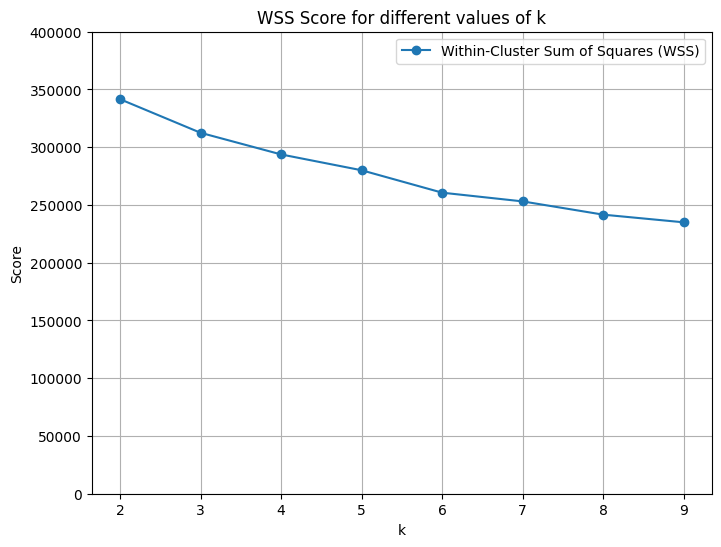

In [13]:
# TODO: Write your code here

plot_multiple_r2_on_same_axis(np.arange(2,10),[sil_scores],['Silhouette Score'],[0,0.2],'k','Score','Silhouette Score for different values of k',0)
plot_multiple_r2_on_same_axis(np.arange(2,10),[wss_scores],['Within-Cluster Sum of Squares (WSS)'],[0,400000],'k','Score','WSS Score for different values of k',0)
#print(wss_scores)


# Checking Output

To see how good was our clustering we will use a sample check and t-SNE method.

first randomly select two song from every cluster and see how close these two songs are.

In [28]:
# TODO: Write your code here
opt_k=6
centroids, labels = kmeans(data_low_dim, opt_k)
samples=[]
track_names_samples=[]
np.random.seed(30)
song_names=np.array(data['track_name'])
for i in range(opt_k):
    cluster_songs = data_low_dim[labels == i]
    cluster_song_names=song_names[labels==i]
    indexes=np.random.choice(len(cluster_songs), size=2, replace=False)
    samples.append(cluster_songs[indexes])
    track_names_samples.append(cluster_song_names[indexes])
    print(f'cluster : {i} songs:')
    print(cluster_song_names[indexes])



cluster : 0 songs:
['불타오르네 FIRE' 'Land Down Under']
cluster : 1 songs:
['Alladat' '+ High (feat. Jaycob Duque)']
cluster : 2 songs:
['Gentle On My Mind' 'Another Love']
cluster : 3 songs:
['One Call Away' 'No Church In The Wild']
cluster : 4 songs:
["God's Gonna Cut You Down" 'Vibe']
cluster : 5 songs:
['Deep Dark Jungle' 'Dead Mans Hand - Original Mix']


Using t-SNE reduce dimension of data pointe to 2D and plot it to check how good datapoints are clustered (implementing this part is optional and have extra points)

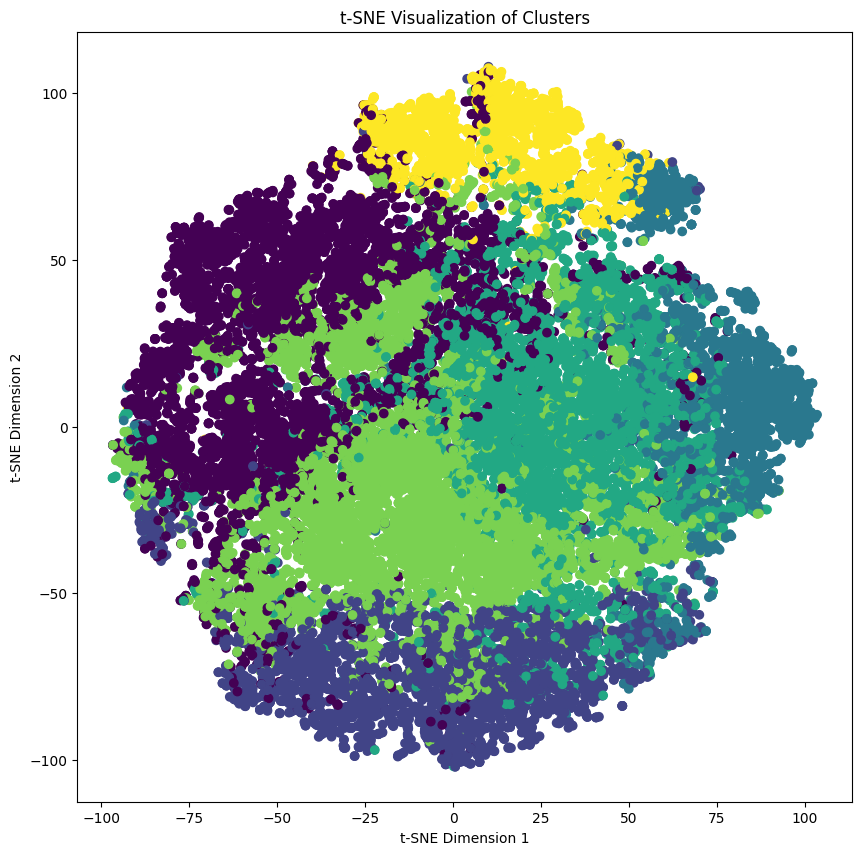

In [29]:
# TODO: Write your code here
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
data_2_dim=tsne.fit_transform(data_low_dim)
 

# Plot the data points in 2D
plt.figure(figsize=(10, 10))
plt.scatter(data_2_dim[:, 0], data_2_dim[:, 1], c=labels)
plt.title("t-SNE Visualization of Clusters")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()
